In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
epigenetics = pd.read_excel("Epigenetic age_Cleaned_18042024.xlsx")
#to match indices:
microbiome = pd.read_csv("Final_df.csv")

In [12]:
epigenetics = epigenetics[epigenetics["Samples"].isin(microbiome["Sample_ID"])].drop([49]).reset_index(drop=True)

In [14]:
epigenetics.columns

Index(['Samples', 'redcap_event_name.x', 'Age_at_blood_colletion', 'Sex',
       'predictedSex', 'Date_of_blood_collection', 'demogr_dob', 'PCHorvath1',
       'PCHorvath2', 'PCHannum', 'PCPhenoAge', 'PCGrimAge', 'PCDNAmTL',
       'PCHorvath1Resid', 'PCHorvath2Resid', 'PCHannumResid',
       'PCPhenoAgeResid', 'PCGrimAgeResid', 'PCDNAmTLResid', 'DunedinPACE',
       'DunedinPoAm', 'Sample_Well', 'Sample_Plate', 'Sentrix_ID',
       'Sentrix_Position'],
      dtype='object')

Median and IQR Statistics:
                 Median              IQR
PCHorvath1   73.313764  [69.726-77.079]
PCHorvath2   78.417627  [73.335-82.903]
PCHannum     85.711403  [81.643-90.096]
PCGrimAge    84.445593  [82.607-87.635]
ClockMedian   81.36939  [77.401-84.491]


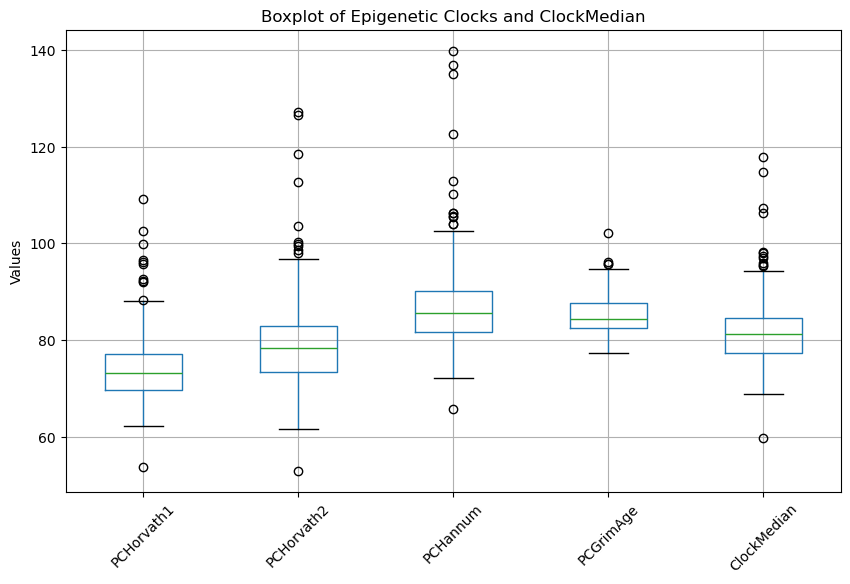

In [18]:
# List of columns to analyze
columns = ['PCHorvath1', 'PCHorvath2', 'PCHannum', 'PCGrimAge']

# Function to calculate median and IQR as a range
def calculate_median_iqr(df, cols):
    stats = {}
    for col in cols:
        median = df[col].median()
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        stats[col] = {'Median': median, 'IQR': f"[{Q1:.3f}-{Q3:.3f}]"}
    return stats

# Calculate stats for existing columns
stats = calculate_median_iqr(epigenetics, columns)

# Add a new column: median of all clocks for each sample
epigenetics['ClockMedian'] = epigenetics[columns].median(axis=1)

# Calculate stats for the new 'ClockMedian' column
clock_median_stats = calculate_median_iqr(epigenetics, ['ClockMedian'])
stats.update(clock_median_stats)

# Convert stats to a DataFrame for display
stats_df = pd.DataFrame(stats).T
print("Median and IQR Statistics:\n", stats_df)

# Plot boxplots for all columns including ClockMedian
plt.figure(figsize=(10, 6))
epigenetics[columns + ['ClockMedian']].boxplot()
plt.title("Boxplot of Epigenetic Clocks and ClockMedian")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

